In [1]:
import numpy as np
import math
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
x, y = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

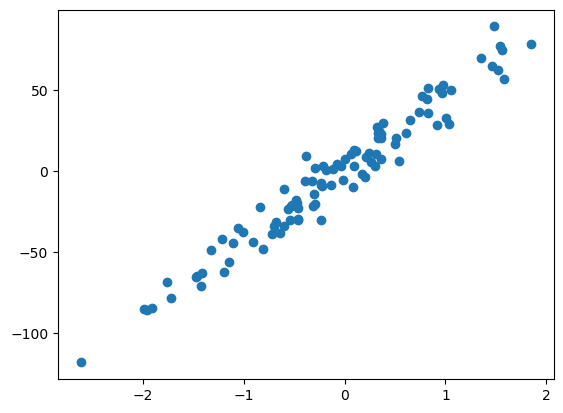

In [3]:
plt.plot(x, y, 'o', label='Data points')

In [4]:
class LinearRegression:
    def __init__(self, lr: float = 0.01, n_iters: int = 1) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.random.rand(num_features)
        self.bias = 0

        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/ num_samples) * np.dot(X.T, y_pred - y)
            db = (1/ num_samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

        return self


    def predict(self, X):
        return np.dot(X, self.weights) + self.bias



In [5]:
x, y = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

reg = LinearRegression()

reg.fit(x, y)
y_pred = reg.predict(x)


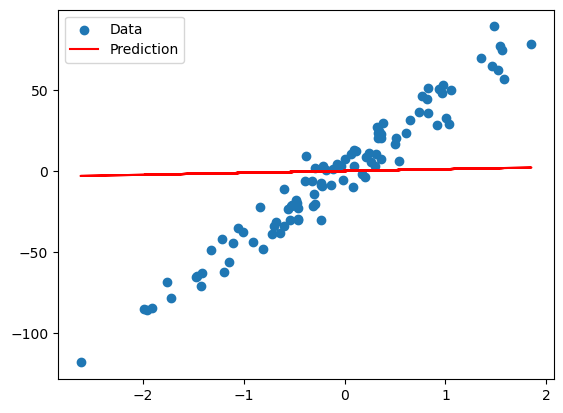

In [6]:
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='Prediction')
plt.legend()
plt.show()

In [7]:
print(y_pred)

[ 1.04383959  0.0670475  -1.25745709  0.3299221  -0.58808024  0.71571928
 -0.56984965  0.59408381  0.67405249  1.12743729  0.91728782  1.74586718
  0.82075102 -0.28783158 -0.96910838  0.07250134 -2.30103931  0.56019176
  1.15921665 -3.06475736  0.54103933  0.07865294 -0.57252474  1.02546847
  1.77665204  1.66211326 -0.72861669 -0.07511879 -0.72985229 -1.41769898
  0.37951791  0.40102159  0.26837797 -0.64660907 -1.08426684  0.19410437
 -0.37962407  0.38475162  0.91803109 -0.37116211  0.38447345 -0.81687778
  1.72850416 -0.63331496 -0.30458691 -0.48734329 -0.38204957 -0.78008204
  0.34670321  0.20799131 -0.41277816 -0.02775109 -0.30456791  1.67628126
 -0.47921423  0.3639048   0.34961001 -0.24847806 -0.30508877 -2.33331869
  0.34130325 -0.29489449 -1.31371594 -0.84595489 -1.72697929  1.08707138
 -2.0294269  -2.24736543 -0.68424374  0.85426767  0.90643884 -1.667727
 -1.74434269 -1.44620444 -1.00465648  1.79350881  1.09505496  0.24628704
  0.30894878 -0.66352757 -2.07353508  0.09467189  0.1

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_regression

In [9]:
x, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=12)
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float().view(-1,1)

In [10]:
model = nn. Linear(1,1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [11]:
for epoch in range(1000):
    y_pred = model(x)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1)%100 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')



Epoch 100, Loss: 118.3304
Epoch 200, Loss: 100.2010
Epoch 300, Loss: 99.8866
Epoch 400, Loss: 99.8795
Epoch 500, Loss: 99.8794
Epoch 600, Loss: 99.8794
Epoch 700, Loss: 99.8794
Epoch 800, Loss: 99.8794
Epoch 900, Loss: 99.8794
Epoch 1000, Loss: 99.8794


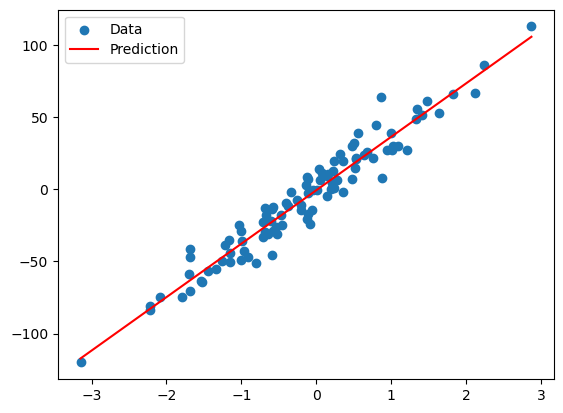

In [12]:
# Plot
with torch.no_grad():
    y_pred = model(x)

sorted_idx = x[:,0].argsort()
plt.scatter(x, y, label='Data')
plt.plot(x[sorted_idx], y_pred[sorted_idx], color='red', label='Prediction')
plt.legend()
plt.show()

In [13]:
x = np.arange(1, 10, 2)
x

array([1, 3, 5, 7, 9])

In [15]:
sq = lambda x: list(i**2 for i in x) 
sq(x)


[1, 9, 25, 49, 81]